## Introduction to convolution Neural Networks (CNN) and Computer vision with TensorFlow

### Get the data
The image we are working with are from the Food101 dataset(101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we have modified it to only use two classes (Pizza & Steak) using the imge data modified notebook

**Note**: We start with a smaller dataset to we can quickly figure what works before scaling up


In [ ]:
#Get the data

import zipfile
import wget

filename = wget.download('https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip') 

#unzip the downloaded file
zip_ref=zipfile.ZipFile(filename)
zip_ref.extractall()
zip_ref.close()

### Inspect the dataset
At the biginning of any ML project inspect the dataset.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [6]:
import os

#Walk through pizza_steak directory and list number of file

for dirpath, dirname, filename in os.walk("pizza_steak"):
    print(f"There are  {len(dirname)} directories and {len(filename)} images in '{dirpath}'")

There are  2 directories and 0 images in 'pizza_steak'
There are  2 directories and 0 images in 'pizza_steak/test'
There are  0 directories and 250 images in 'pizza_steak/test/steak'
There are  0 directories and 250 images in 'pizza_steak/test/pizza'
There are  2 directories and 0 images in 'pizza_steak/train'
There are  0 directories and 750 images in 'pizza_steak/train/steak'
There are  0 directories and 750 images in 'pizza_steak/train/pizza'


In [ ]:
# Another way to find out how many images are in a file

num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_image_train

750

### To Visualize our image, first let's get the class name programmatically

In [ ]:
# Get the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_name from the subdirectory
print(class_name)

['pizza' 'steak']


In [4]:
#Let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #Setup the target directory (We'll view images from there)
    target_folder = target_dir+target_class

    #Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    #Read in the image as plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


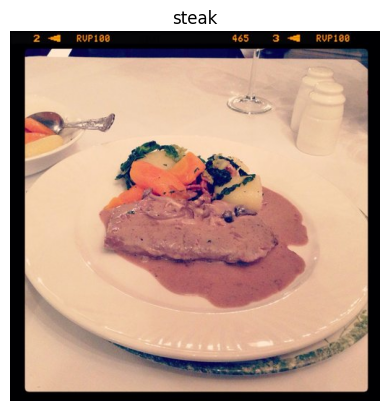

In [7]:
#View a random iamge from training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img) #converted in tensor

2024-05-27 21:37:13.651614: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[23, 15, 12],
        [22, 14, 11],
        [19, 12,  6],
        ...,
        [ 1,  3,  2],
        [ 0,  2,  1],
        [ 0,  1,  0]],

       [[21, 13, 10],
        [19, 11,  8],
        [16,  9,  3],
        ...,
        [ 1,  3,  2],
        [ 0,  2,  1],
        [ 0,  2,  1]],

       [[19,  9,  7],
        [16,  6,  4],
        [13,  4,  0],
        ...,
        [ 2,  4,  1],
        [ 1,  3,  0],
        [ 0,  2,  0]],

       ...,

       [[14, 11, 20],
        [14, 11, 20],
        [15, 12, 21],
        ...,
        [ 7,  5,  8],
        [ 7,  5,  8],
        [ 7,  5,  8]],

       [[14, 11, 20],
        [14, 11, 20],
        [14, 11, 20],
        ...,
        [ 7,  5,  8],
        [ 7,  5,  8],
        [ 7,  5,  8]],

       [[13, 10, 19],
        [13, 10, 19],
        [14, 11, 20],
        ...,
        [ 7,  5,  8],
        [ 7,  5,  8],
        [ 7,  5,  8]]], dtype=uint8)>

In [ ]:
#View the image shape

img.shape #Return width, height, color channels

(382, 512, 3)

In [ ]:
#Get the all the pixel values between 0 & 1 
# Normalizing the data

img/255.  #Manually, divided with 255, because 255 is maximum value for the pixel

array([[[0.09019608, 0.05882353, 0.04705882],
        [0.08627451, 0.05490196, 0.04313725],
        [0.0745098 , 0.04705882, 0.02352941],
        ...,
        [0.00392157, 0.01176471, 0.00784314],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.00392157, 0.        ]],

       [[0.08235294, 0.05098039, 0.03921569],
        [0.0745098 , 0.04313725, 0.03137255],
        [0.0627451 , 0.03529412, 0.01176471],
        ...,
        [0.00392157, 0.01176471, 0.00784314],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157]],

       [[0.0745098 , 0.03529412, 0.02745098],
        [0.0627451 , 0.02352941, 0.01568627],
        [0.05098039, 0.01568627, 0.        ],
        ...,
        [0.00784314, 0.01568627, 0.00392157],
        [0.00392157, 0.01176471, 0.        ],
        [0.        , 0.00784314, 0.        ]],

       ...,

       [[0.05490196, 0.04313725, 0.07843137],
        [0.05490196, 0.04313725, 0.07843137],
        [0.05882353, 0

## An end-to-end example

Build a convolution neural network to find pattern in our image, more specifically we need a way to 

* Load our image
* Preprocess out image
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

# Preprocessing data (get all of the pixel values between 0 and 1, also called the normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Set paths to our dta directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)


valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                                class_mode="binary",
                                                seed=42
                                               )


#Build CNN model (Same as the Tiny VGG on the CNN website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 457s 10s/step - loss: 0.6112 - accuracy: 0.6580 - val_loss: 0.4537 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 36s 758ms/step - loss: 0.4371 - accuracy: 0.8053 - val_loss: 0.3769 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 39s 837ms/step - loss: 0.3932 - accuracy: 0.8353 - val_loss: 0.3489 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 38s 804ms/step - loss: 0.3370 - accuracy: 0.8553 - val_loss: 0.3091 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 38s 806ms/step - loss: 0.3020 - accuracy: 0.8793 - val_loss: 0.2936 - val_accuracy: 0.8780


In [13]:
#Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### CNN details
https://poloclub.github.io/cnn-explainer/


In [14]:
## using the same model as before let's build model non-CNN 

#set the random seed
tf.random.set_seed(42)

#Create a model to replicate the TensorFlow 

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"), 
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model 

model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 230ms/step - loss: 0.7720 - accuracy: 0.5087 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
17/47 [=========>....................] - ETA: 5s - loss: 0.6932 - accuracy: 0.5000

### Let's try to improve the above non-CNN model

In [ ]:
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_3= model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 17s 320ms/step - loss: 2.8717 - accuracy: 0.6247 - val_loss: 2.0543 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 23s 486ms/step - loss: 1.1647 - accuracy: 0.6700 - val_loss: 0.7543 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 20s 418ms/step - loss: 0.6967 - accuracy: 0.7340 - val_loss: 1.1040 - val_accuracy: 0.6240
Epoch 4/5
47/47 [==============================] - 16s 348ms/step - loss: 0.5941 - accuracy: 0.7653 - val_loss: 0.4991 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 21s 440ms/step - loss: 0.4755 - accuracy: 0.7887 - val_loss: 0.6060 - val_accuracy: 0.7200


In [ ]:
#Get a summary of model_3
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 100)               15052900  
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### As we can see above example how CNN is powerful to prepare the model. In comparision to non-cnn

## Binary classification: Let's break it down
1. Become one with the data 
2. Preprocess the data (scaling/normalizing/convert into batches)
3. Created a model (Start with a baseline)
4. Fir the model 
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repear until satisfy

## 1. Become one with data

Image shape: (343, 512, 3)
Image shape: (512, 383, 3)


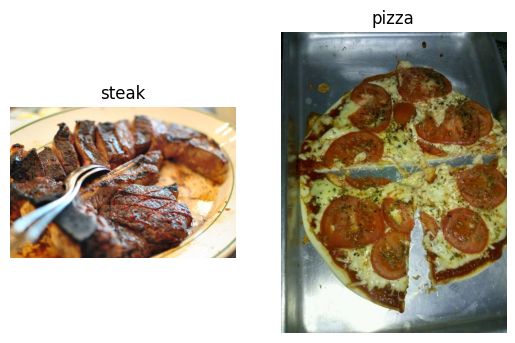

In [11]:
#Visualize data 
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data (prepare it for a model)

In [14]:
# Define directory dataset path

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Our next step is to turn our data into batches.

It does it for a couple of reasons:
1. All images might not fit into the memory of all the data.
2. Recommanded batch size is 32

In [15]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [16]:
# Load in our image data from directories and trun into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,    #Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", #Type of data your're working with
                                               batch_size=32) #Size of minibatches


test_data = train_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
#Get a sample of a train data batch
images, labels = train_data.next() # Get the next batch of image/label in train data

len(images), len(labels)

(32, 32)

In [20]:
# How many batches are there
len(train_data)

47

In [22]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.19215688, 0.20784315, 0.21176472],
          [0.20000002, 0.21568629, 0.21960786],
          [0.19607845, 0.21176472, 0.20784315],
          ...,
          [0.45882356, 0.37254903, 0.227451  ],
          [0.454902  , 0.36862746, 0.22352943],
          [0.45098042, 0.37254903, 0.227451  ]],
 
         [[0.19607845, 0.21176472, 0.21568629],
          [0.19607845, 0.21176472, 0.20784315],
          [0.18823531, 0.20392159, 0.20000002],
          ...,
          [0.4784314 , 0.3921569 , 0.24705884],
          [0.47058827, 0.38431376, 0.2392157 ],
          [0.46274513, 0.37647063, 0.23137257]],
 
         [[0.18431373, 0.20000002, 0.19607845],
          [0.18431373, 0.20000002, 0.19607845],
          [0.19607845, 0.21176472, 0.20784315],
          ...,
          [0.48235297, 0.38823533, 0.2392157 ],
          [0.48235297, 0.39607847, 0.24313727],
          [0.47450984, 0.38823533, 0.23529413]],
 
         ...,
 
         [[0.56078434, 0.43921572, 0.25490198],
          [0.57647

In [24]:
images[7].shape

(224, 224, 3)

In [25]:
# View the first batch of labels
labels

array([0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.],
      dtype=float32)

## Create a CNN model (Start with a baseline)

A baseline is a relatively simple model for existing result that you setup when begining a machine experimenting, you try to bear the baseline

**Note:** In deep learning there is almost an infinite amoount of architecture you could clreate, SO one of the base way to get startwd with simple and see if 
things are working and then add the complexity as required.

In [8]:
#Makje the creating of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


### CNN explainer 
https://poloclub.github.io/cnn-explainer/


In [9]:
#Create the model (this will be our baseline, a layer convolutional neural network)

model_4 = Sequential([
    Conv2D(filters=10, #filter is hte numnber of sliding windows going accross an input (higher=more complex model)
           kernel_size=3, #the size of the sliding window going accross the input 
           strides=1, #the size of the step the sliding window takes accross an input.
           padding="valid",  #if it's value is "same" then input and output value would be same, if "valid", then output would be compressed.  
           activation="relu",
           input_shape=(244, 224, 3)), #input layer speficy input shap
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") #Output layer working with binary 
])

In [11]:
#Complile the model

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [12]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 242, 222, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 240, 220, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 238, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 518840)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 518841    
                                                                 
Total params: 520941 (1.99 MB)
Trainable params: 520941 (1.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:

## check the length of training and test data 
len(train_data), len(valid_data)

(47, 16)

In [24]:
## Fit the model

history_4 = model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sequential_2/dense_2/BiasAdd defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1077, in launch_instance

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/local/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 529, in dispatch_queue

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 518, in process_one

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 424, in dispatch_shell

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 766, in execute_request

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/Users/amitvermaknw/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/var/folders/4n/_x1rj7mn2llgyr3nw_tnr3300000gn/T/ipykernel_48757/1345078492.py", line 3, in <module>

  File "/usr/local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 252, in call

Matrix size-incompatible: In[0]: [32,475240], In[1]: [518840,1]
	 [[{{node sequential_2/dense_2/BiasAdd}}]] [Op:__inference_train_function_1555]